# **Funciones de Pérdida en Redes Neuronales**

## **¿Qué es una función de pérdida?**

Es un método que evalua la eficacia del algoritmo para modelar un conjunto de datos. Se trata de una métrica matemática que mide el nivel de error o discrepancia entre las predicciones de un modelo de aprendizaje automático y los valores reales que se espera que el modelo prediga. Son esenciales para entrenar modelos de machine learning, ya que el entrenamiento consiste en minimizar esta función.

Si las predicciones son totalmente erróneas, la función de pérdida generará un valor mayor. Si son bastante acertadas, generará un valor menor. A medida que se modifican aspectos del algoritmo para intentar mejorar el modelo, la función de pérdida indica si se está avanzando.

## **Tipos Comunes de Funciones de Pérdida**

Muchas de las funciones de pérdida implementadas en el aprendizaje automático pueden resultar complejas y confusas. Pero si recuerda el objetivo final de todas ellas (medir el rendimiento de su algoritmo en su conjunto de datos), podrá controlar esa complejidad.

Segun el problema que deseamos resolver, podemos clasificar las funciones de perdida en: 

### **Para Problemas de Regresión**

Las siguientes funciones se utilizan cuando la variable objetivo es continua, tipico en problemas de regresion. 

#### 1. _Error Cuadrático Medio (MSE)_

Mide la diferencia entre los valores predichos por un modelo y los valores reales, elevando al cuadrado cada error individual para penalizar errores grandes. 

Es util cuando se busca minimizar grandes errores (es decir, evitar predicciones muy alejadas del valor real) o si los errores extremos son costosos.

La formula que lo define es la siguiente:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

En Keras se obtiene como: `mean_squared_error`


#### 2. Error Absoluto Medio (MAE)

Mide el promedio de las diferencias absolutas entre los valores reales y los valores predichos.

Se utiliza cuando se necesita una medida robusta ante outliers o cuando todos los errores importan por igual, sin querer penalizar más los errores grandes.

La formula que lo define es la siguiente

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

En Keras se obtiene como: `mean_absolute_error`

### **Para Problemas de Clasificación**

Las siguientes funciones se utilizan cuando la variable objetivo es discreta, tipico en problemas de clasificacion. 


#### 1. Entropía Cruzada Binaria (Binary Crossentropy)

Mide la diferencia entre la probabilidad real (etiquetas) y la probabilidad predicha por el modelo. Penaliza fuertemente cuando el modelo está muy seguro de una predicción incorrecta.

Se utiliza en modelos de clasificación binaria y cuando el modelo predice probabilidades (no clases directamente).  Ideal cuando se desea que el modelo sea probabilísticamente confiable.

La formula que lo define es la siguiente:

$$\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

Donde;

$n$: número de muestras.

$y_i$: valor real de la clase para la muestra $i$ $(0\ o\ 1)$.

$\hat{y}_i$: probabilidad predicha por el modelo para la clase positiva $(1)$, es decir, $\hat{y}_i ∈[0,1] $

$\text{log}$: el logaritmo natural.


En Keras se encuentra como: `binary_crossentropy`

#### 2.  Entropía Cruzada Categórica (Categorical Crossentropy)

Mide la diferencia entre la distribución real de clases (etiquetas verdaderas) y la distribución predicha por el modelo (probabilidades). Penaliza fuertemente cuando el modelo predice baja probabilidad para la clase verdadera.

Se utiliza principalmente en problemas de clasificación multiclase. Tambien cuando el target está codificado en one-hot o como índices enteros de clases. Se aplica junto con softmax como función de activación en la capa de salida.

Su formula es la siguiente:


$$\text{CCE} = -\sum_{i=1}^{n} \sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic})$$

Donde:

$n$: es el número de muestras.

$C$: es el número de clases.

$y_{ic}$: es el valor real ($1$ si la muestra $i$ pertenece a la clase $c$, de lo contrario $0$).

$\hat{y}_{ic}$: es la probabilidad predicha para que la muestra $i$ pertenezca a la clase $c$.

En Keras se encuentra como: `categorical_crossentropy`

#### 3.  Sparse Categorical Crossentropy

Compara la probabilidad predicha para la clase correcta (índice entero) con las probabilidades calculadas por el modelo (softmax). Penaliza más cuando el modelo da baja probabilidad a la clase verdadera.

Se usa en problemas de clasificación multiclase donde las etiquetas verdaderas son enteros (clases codificadas como 0, 1, 2, ...) en lugar de vectores one-hot.

La formula que lo define es la siguiente:

$$\text{Sparse CCE} = -\sum_{i=1}^{n} \log(\hat{y}_{i, y_i})$$

Donde:

$n$: es el número de muestras.

$y_i$: es la clase verdadera de la muestra $i$, expresada como un índice entero en el rango $[0 , C−1]$, donde $C$ es el número de clases.

$\hat{y}_{i, y_i}$: es la probabilidad predicha por el modelo para la clase verdadera $y_i$ de la muestra $i$.

En Keras se enuentra como: `sparse_categorical_crossentropy`

## **Ejemplo desde la intuición**

Supón que para una muestra el valor real es $y_i = 1$ (`clase 1`), y el modelo predice $\hat{y}_i = 0.9$ (una probabilidad alta de ser 1). Entonces, para este caso, usamos la funcion de perdida _BCE_ cuya formula es la siguiente:

$$\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

Sustituyendo los valores a la formula obtenemos:

$$\text{BCE} = 1. \log(0.9) + (1 - 1) \log(1 - 0.9)$$


la parte de la fórmula relevante sería:

$$y_i. \text{log}(\hat{y}_i)\ =\ 1\ \text{x}\ \text{log}(0.9)\ =\ \text{log}(0.9)\ \thickapprox\ -0.105$$

**Interpretación**: *Este valor negativo pequeño indica que el modelo hizo una buena predicción*.

Si en cambio el modelo predice $\hat{y}_i = 0.1$ (una probabilidad baja de ser 1), entonces:

$$\text{BCE} = 1. \log(0.1) + (1 - 1) \log(1 - 0.1)$$

Al calcular solo la parte relevante de la formula obtenemos:

$$y_i. \text{log}(\hat{y}_i)\ =\ 1\ . \text{log}(0.1)\ =\ \text{log}(0.1)\ \thickapprox\ -2.3$$

**Interpretación**: *Este valor negativo grande indica que el modelo hizo una mala predicción*.

**Para el caso en que la etiqueta de la muestra evaluada sea `clase 0`**

Utilizamos la formula de _BCE_:

$$\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

Para este caso $y_i$ = 0 y el modelo predice $\hat{y}_i = 0.1$ (una probabilidad baja de ser 1), entonces:

$$\text{BCE} = 0. \log(0.1) + (1 - 0) \log(1 - 0.1)$$

Haciendo el calculo de la parte mas relevante de la formula obtenemos:

$$(1 - y_i). \text{log}(\hat{y}_i)\ =\ (1 - 0)\ . \text{log}(0.9)\ =\ \text{log}(0.9)\ \thickapprox\ -0.105$$



**Interpretación**: *Este valor negativo pequeño indica que el modelo hizo una buena predicción*.

> De esta forma, probamos que la funcion de perdida nos indica aue tan eficiente es el modelo para lograr buenas predicciones. El objetivo ultimos de los modelos de IA es minimizar, lo mas posible, la funcion de perdida ajustando sus parametros para asi lograr un buen rendimiento.

## **Ejemplos Prácticos:**

#### Ejemplo 1: _Función de Pérdida de Regresión (MSE)_

Vamos a entrenar una red neuronal simple para que aprenda de una relación lineal con ruido entre variables simuladas. Esto con el objetivo de mostrar como la funcion de perdida disminuye a medida que el modelo aprende de los datos. 

/home/jbernal/anaconda3/envs/tf_cpu_3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


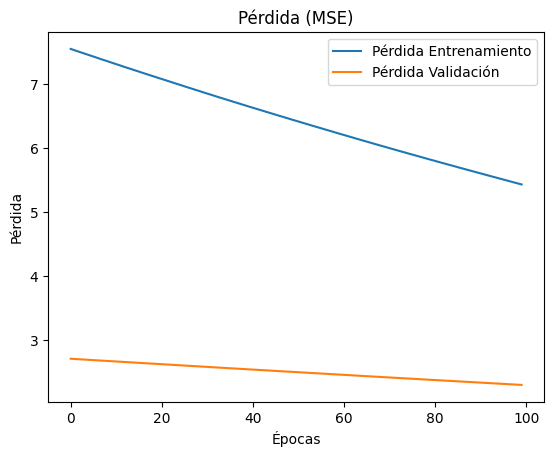

In [33]:
# importar librerias de interes 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generar datos simulados
X = np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.1  # Relación lineal con algo de ruido

# Definir un modelo simple de red neuronal
model = Sequential([
    Dense(1, input_dim=1)
])

# Compilar el modelo con la función de pérdida MSE
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo con 100 epocas
history = model.fit(X, y, epochs=100, validation_split=0.2, verbose=0)

# Graficar la pérdida durante el entrenamiento
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['mae'], label='Pérdida Validación')
plt.title('Pérdida (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


> Vemos como la perdida va diminuyendo de manera lineal, a medida que transcurren las epocas. La linealidad se debe a que estamos tratando con un modelo de una sola neurona.

> La perdida en validacion inicia en 4 a diferencia que en entrenamiento donde inicia en 16. Lo importante es que ambas bajen a medida que aprende el modelo

> No hay evidencia de sobrejaute pero si podria haber subja

> El concepto de epoca aca, es importante: representa una pasada completa de todos los datos de entrenamiento y de validacion por el modelo. El modelo aprende poco a poco ajustando sus pesos después de ver cada lote de datos (batch). Una sola pasada no suele ser suficiente para encontrar buenos valores de los parámetros. Por eso se hacen múltiples épocas.

#### Ejemplo 2: _Función de Pérdida para Clasificación (Entropía Cruzada Binaria)_

Vamos a entrenar una red neuronal simple para un problema de clasificación binaria. Esto lo haremos con datos artificiales y lo que se busca es mostrar el comportamiento de la funcion de perdida, que en este caso es _Binary Crossentropy_, en diferentes epocas.

/home/jbernal/anaconda3/envs/tf_cpu_3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


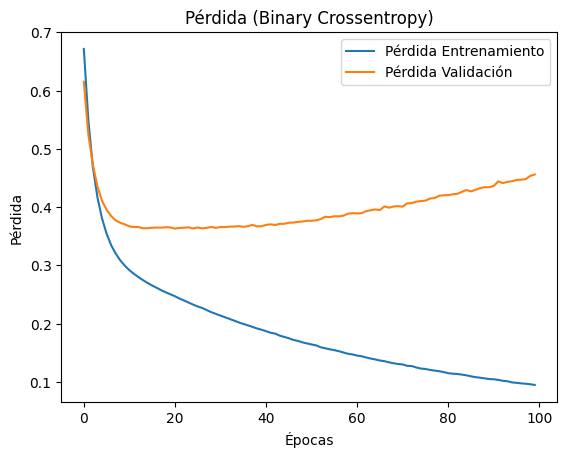

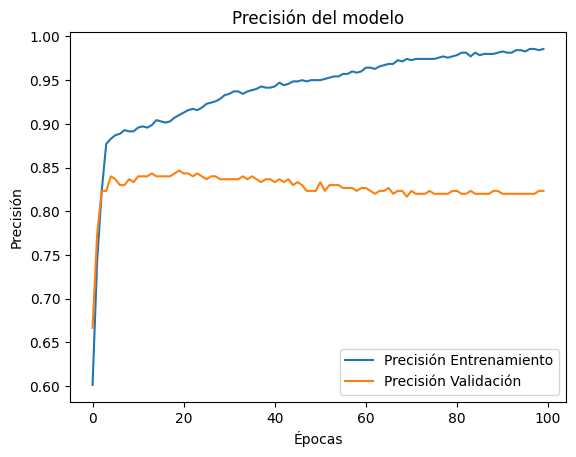

In [ ]:
# importar librerias de interes
from sklearn.datasets import make_classification # genera datos artificiales
from sklearn.model_selection import train_test_split # dividir datos

# Generar datos simulados de clasificación binaria
# genera 1000 ejemplo con 20 variables para un problema de clasificacion binaria
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una red simple de 64 neuronas con activacion Relu y una neurona de salida
model = Sequential([
    Dense(64, activation='relu', input_dim=20),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilar el modelo con Binary Crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con 100 epocas
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# Graficar la pérdida y la precisión durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida (Binary Crossentropy)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


> La grafica de perdida muestra que la perdida de entrenamiento y validacion disminuyen hasta la epoca 14 aproximadamente. Luego, la perdida de entrenamiento sigue disminuyendo y la perdida de validacion comienza a aumentar. Este comportamiento se sigue hasta la epoca 100. Es un comportamiento tipico de sobreajuste del modelo.

> El punto de inflexion, aquel que indica el mejor numero de epocas para evitar el sobreajuste, viene dado por la perdida mas pequena en validacion. Con ese numero de epocas, el modelo a aprendido lo suficiente de los datos, sin llegar a memorizar, para generalizar ante datos nuevos.

> La grafica de precision muestra que luego de 3 epocas, las precisiones de entrenamiento y validacion son diferentes con una variacion 5 puntos. Luego hasta la epoca 14, la precision en validacion es estable mientras que la de entrenamiento sigue en aumento. Despues de la epoca 14, la precision en validacion disminuye ligeramente y la de entrenamiento aumenta fuertemente. Este comportamiento se mantiene hasta la epoca 100.

> Justo donde la precision de validacion comienza a disminuir es un buen valor de epocas para entrenar el modelo.

#### Ejemplo 3: _Funcion de perdida para clasificacion multiclase (Entropia cruzada categorica)_

En este ejemplo, entrenamos una red neuronal con datos generados artificialmente que corresponden a un problema de clasificacion multiclase. Se trabaja con 20 features y un target compuesto por 3 clases. Buscamos analizar el comportamiento de la funcion de perdida _Entropia Cruzada Categorica_ a medida que el modelo aprende de los datos

2025-05-31 08:18:43.487587: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 08:18:43.798039: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 08:18:44.074593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748697524.341297    7081 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748697524.405943    7081 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-31 08:18:45.585021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

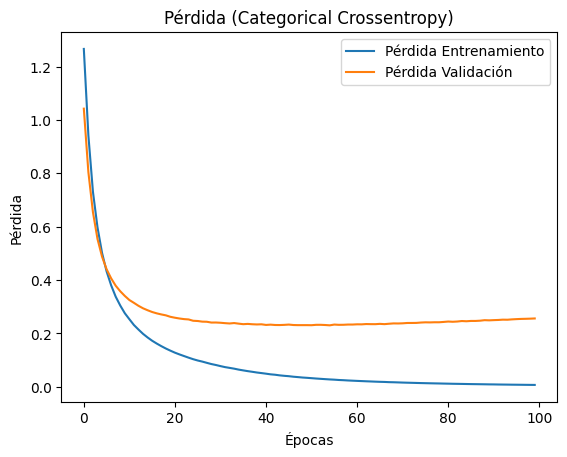

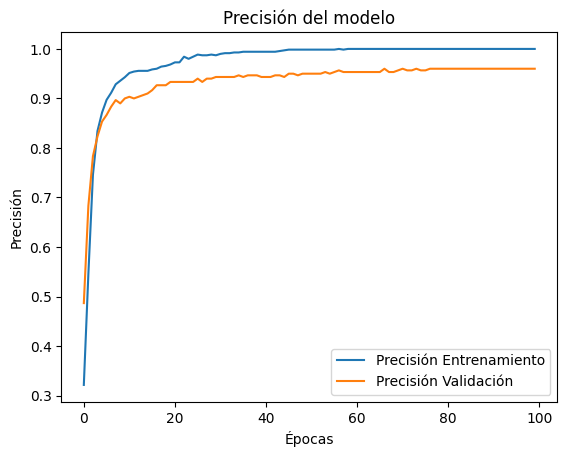

In [ ]:
# importar librerias
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Generar datos simulados de clasificación multiclase (3 clases)
# 20 features con 1000 registros
# n_informative define el numero de features utile para predecir la clase
# n_clusters_per_class define el numero de agrupaciones por clase
# n_redundant define el numero de features redundantes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=5,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Codificar etiquetas a One-Hot
y_encoded = to_categorical(y, num_classes=3)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Crear la red neuronal de 64 neuronas con activacion Relu y 3 neuronas de salida
model = Sequential([
    Dense(64, activation='relu', input_dim=20),
    Dense(3, activation='softmax')  # Salida con 3 clases
])

# Compilar con categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con 100 epocas
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida (Categorical Crossentropy)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


__Gafica de Perdida__

> La pérdida de entrenamiento disminuye continuamente hasta volverse muy baja, lo cual indica que el modelo se ajusta muy bien a los datos de entrenamiento.

> La pérdida de validación también disminuye al principio, pero luego se estabiliza y empieza a aumentar ligeramente a partir de la época ~60.

> Es una señal clara de sobreajuste (overfitting). A partir de cierto punto, el modelo comienza a aprender ruido o patrones específicos del conjunto de entrenamiento que no generalizan bien al conjunto de validación.

__Grafica de Precision__

> La precisión de entrenamiento alcanza casi el 100%, lo que confirma que el modelo se ajusta muy bien a esos datos.

> La precisión de validación también es alta (~94%), pero se estabiliza sin seguir mejorando a partir de cierto punto.

> Aunque el modelo generaliza bastante bien, hay una diferencia entre la precisión de entrenamiento y validación, lo que también indica ligero sobreajuste.



#### Ejemplo 4: _Funcion de perdida para clasificacion multiclase (Entropia cruzada Sparce)_

Este ejemplo es similar al anterior, solo que en este caso se toman los valores originales de las clases para entrenar el modelo, sin aplicar One Hot. La funcion de perdida ideal a utilizar es la _Entropia Cruzada Sparce_ y en lo que sigue analizaremos su comportamiento a medida que el modelo aprende de los datos.

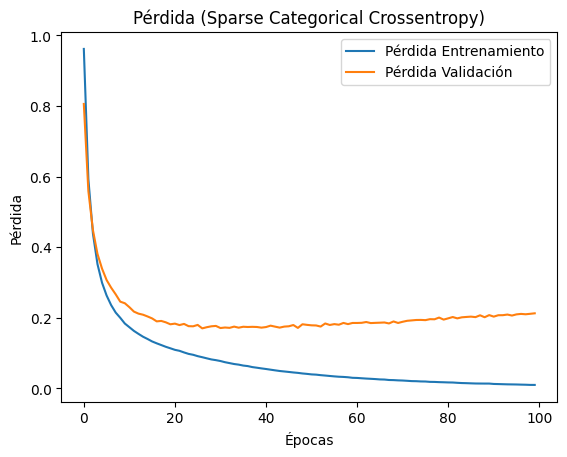

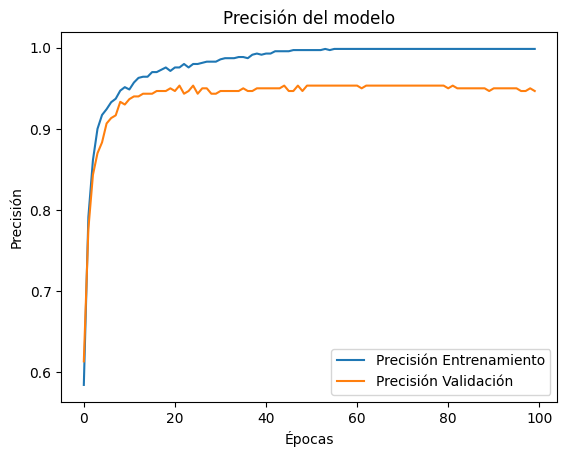

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Generar un problema de clasificación múltiple con 3 clases
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear modelo secuencial para clasificación múltiple
model = Sequential([
    Dense(64, activation='relu', input_dim=20),
    Dense(3, activation='softmax')  # 3 salidas para clasificación multiclase
])

# Compilar con sparse_categorical_crossentropy (etiquetas como enteros)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida (Sparse Categorical Crossentropy)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


__Grafica de Perdida__

> Pérdida de entrenamiento disminuye constantemente hasta alcanzar valores muy bajos.

> Pérdida de validación también disminuye inicialmente, pero se estabiliza a partir de la época 20-30, y luego comienza a aumentar ligeramente.

> El modelo aprende bien al inicio, pero luego de cierta epoca empieza a sobreajustar (overfitting), ya que mejora en los datos de entrenamiento, pero no en los de validación.

__Grafica de Precision__

> Precisión en entrenamiento sigue aumentando casi hasta alcanzar el 100%.

> Precisión en validación también mejora rápidamente al inicio, estabilizándose alrededor del 95%, pero sin seguir el ritmo del entrenamiento.

> El modelo tiene buena capacidad de aprendizaje, pero también hay señales claras de sobreajuste moderado (el rendimiento se estanca en validación mientras sigue mejorando en entrenamiento).

## __Ejemplo con datos reales__

Usando los datos de _Datos_baterias.csv_, contruir una red neuronal MLP para resolver este problema de regresión, en el cual se busca predecir el porcentaje de carga de una batería de celular con base en los minutos de conexión a la red eléctrica.

El objetivo es comparar el rendimiento de la red neuronal usando distintas funciones de perdida.

Para este ejercicio, vamos a crear una MLP con una entrada, tres capas ocultas y una salida, donde usaremos funciones de activación ReLU entre las capas ocultas. Para la compilación del modelo usaremos las funciones de pérdida MSE y MAE y 100 epocas para despues observar cómo cambian estas en diferentes epocas.  

In [27]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt


# cargar datos
df = pd.read_csv('./Datos_baterias.csv')

# definir los features y target
X = df.minutos
y = df.bateria

Creamos una funcion para generar los modelos MLP y asi probar las funciones de perdida MSE y MAE. Como metrica de evaluacion del modelo, usaremos el Error Absoluto Medio (MAE).

In [28]:
# librerias
from keras.models import Sequential
from keras.layers import Dense,  Input
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
import keras
import tensorflow as tf

# funcion que crea modelos MLP pasando la configuracion de neuronas y la 
# funcion de perdida de interes
def build_model(neuronas_por_capa, loss_function):
    model = Sequential()
    # Capa de entrada
    model.add(keras.Input(shape=(1,)))

    # Primera capa oculta
    model.add(Dense(neuronas_por_capa[0], activation='relu'))

    # Segunda capa oculta
    model.add(Dense(neuronas_por_capa[1], activation='relu'))

    # Tercera capa oculta
    model.add(Dense(neuronas_por_capa[2], activation='relu'))

    # Capa de salida. Salida de regresión (un valor continuo)
    model.add(Dense(1))

    # Compilación del modelo con MSE como funcion de perdida
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
        loss=loss_function, # mse o mae
        metrics=['mae'])   # mse o mae 

    return model


### Modelo 1: Configuracion[32,16,8] Funcion de perdida (MSE)

Modelo conformado por 32 neuronas en la primera capa, 16 en la segunda y 8 en la tercera. Probamos con MSE como funcion de perdida.


Entrenando modelo con neuronas [32, 16, 8]


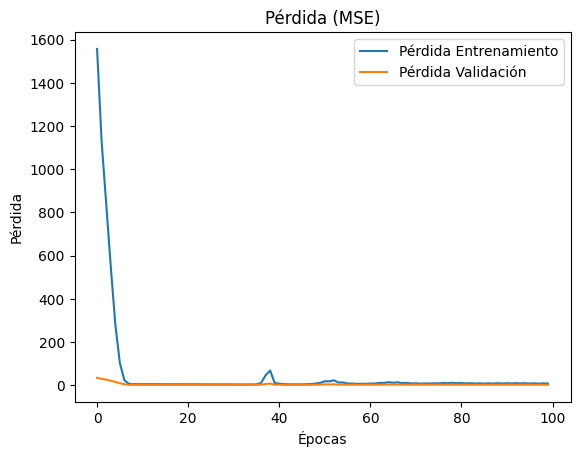

In [29]:
# crear modelo
model_1_MSE = build_model([32,16,8], MeanSquaredError())

# entrenar modelo con 100 epocas y con batch de 16
print(f"\nEntrenando modelo con neuronas [32, 16, 8]")
history1 = model_1_MSE.fit(X, y, epochs=100, batch_size=16, verbose=0)

# Graficar pérdida
plt.plot(history1.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history1.history['mae'], label='Pérdida Validación')
plt.title('Pérdida (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

> La perdida de MSE en entrenamiento comienza muy alta (>1400) y cae rapidamente en las 5 primeras epocas. Es normal este comportamiento cuando el modelo comienza a aprender rapidamente.

> La perdida de MSE en validacion baja rapidamente y se mantiene estable desde las primera 10 epocas. Este comportamiento indica un buen ajuste del modelo sin evidencia de overfitting.

### Modelo 2: Configuracion[32,16,8] Funcion de perdida (MAE)

 Probamos con el mismo modelo 1 pero esta vez con MAE como funcion de perdida.


Entrenando modelo con neuronas [32, 16, 8]


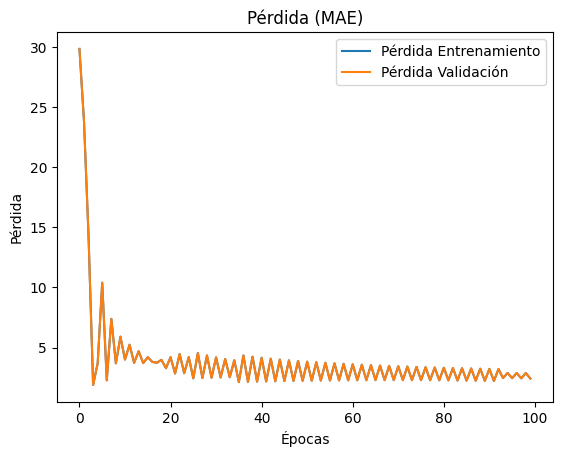

In [30]:
# crear modelo
model_2_MAE = build_model([32,16,8], MeanAbsoluteError())

# entrenar modelo con 100 epocas y con batch de 16
print(f"\nEntrenando modelo con neuronas [32, 16, 8]")
history2 = model_2_MAE.fit(X, y, epochs=100, batch_size=16, verbose=0)

# Graficar pérdida
plt.plot(history2.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history2.history['mae'], label='Pérdida Validación')
plt.title('Pérdida (MAE)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

> Ambas curvas, de entrenamiento y validacion, estan superpuestas lo que indica que el modelo generaliza bien. Inician con perdida de 30, bastante bajo repecto a MSE del modelo anterior.

> Las oscilaciones que se muestran reflejan la variabilidad del error absoluto entre muestras, pero no implica un mal rendimiento. Adema, MAE se mantiene bajo a lo largo de las epocas. 

### Conclusion general

Para definir cual modelo es mejor, lo importante es analizar cual logra menor MAE en validacion. El modelo entrenado con MSE como funcion de perdida es mejor ya que:

- Logra un MAE en validacion de 2 a 2.5, mientras que el otro presenta un rango de 2.5 a 4.5

- Generaliza bien sin signos de sobreajuste.

- Presenta mejor estabilidad del error en validacion.

Este resultado era el esperado ya que MSE penaliza mas los errores grandes, ayudando al modelo a aprender ma rapido y con mayor precision. 

## __Lo mas importante...__

Debemos entender que las funciones de pérdida (loss functions) son fundamentales en el entrenamiento de redes neuronales porque guían el proceso de aprendizaje. Su importancia radica en que:

- Miden el error del modelo calculando que tan lejos estan las predicciones de los valores reales.

- Guian los algoritmos de optimizacion, permitiendole ajustar los pesos del modelo para minimizar la perdida. Sin función de pérdida, el modelo no sabría cómo mejorar sus predicciones.

- Determinan el tipo de problema ya que la eleccion de la funcion dependera del problema a abordar.

- Ayudan a monitorear el aprendizaje del modelo y a seleccionar los mejores hiperparametros para obtener un modelo con alto rendimiento.

> La función de pérdida es el corazón del aprendizaje supervisado. Sin ella, una red neuronal no tiene forma de saber si está aprendiendo correctamente.

